In [215]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lin
from time import time

In [167]:
def MatFur(n):
    F=np.empty((n,n),dtype=complex)
    for k in xrange(n):
        F[k,0:n]=np.power(np.exp(-2*np.pi/n*1j*k),range(n))
    return F

In [209]:
def furye(x,n):
    if n==2:
        y=[x[0]+x[1], x[0]-x[1]]
    else:
        nn=n/2
        y=np.append(furye((x[0:nn]+x[nn:n]),nn),
           furye((x[0:nn]-x[nn:n])*np.power(np.exp(-2*np.pi/n*1j),range(nn)),nn))
    return np.append(y[0:n:2],y[1:n:2])
#     return y

In [214]:
n=4
# x=np.empty(n)
# for k in xrange(n):
#     x[k]=np.random.rand()
# x=np.array([0,0,0,1])
# y=furye(x,n)
# print(y)
# print(np.dot(MatFur(n),x))

In [224]:
nn=[2,4,8,16,32,64,128,256,512,1024,2048,4096]
ns=np.size(nn)
tm=np.zeros(ns)
tf=np.zeros(ns)
td=np.zeros(ns)
for k in xrange(ns):
    n=nn[k]
    print(n)
    x=np.zeros(n)
    for i in xrange(n):
        x[i]=np.random.rand()
    y=np.zeros(n)
    
    tic=time()
    y=furye(x,n)
    toc=time()
    tm[k]=toc-tic
    
    tic=time()
    y2=np.fft.fft(x)
    toc=time()
    tf[k]=toc-tic
    
    F=MatFur(n)
    tic=time()
    y=np.dot(F,x)
    toc=time()
    td[k]=toc-tic

2
4
8
16
32
64
128
256
512
1024
2048
4096


[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
[  4.00543213e-05   2.37941742e-04   3.24964523e-04   1.11985207e-03
   1.65200233e-03   1.44600868e-03   2.98500061e-03   8.76998901e-03
   1.25658512e-02   2.14939117e-02   4.37948704e-02   9.21838284e-02]
 
[  2.40802765e-05   2.19345093e-05   2.00271606e-05   2.38418579e-05
   1.81198120e-05   1.50203705e-05   2.21729279e-05   2.40802765e-05
   2.78949738e-05   3.79085541e-05   1.04904175e-04   2.05993652e-04]
 
[  1.88827515e-04   1.00135803e-05   3.50475311e-05   4.60147858e-05
   2.09808350e-05   2.09808350e-05   9.48905945e-05   1.84059143e-04
   6.85930252e-04   2.66408920e-03   9.35387611e-03   7.03449249e-02]


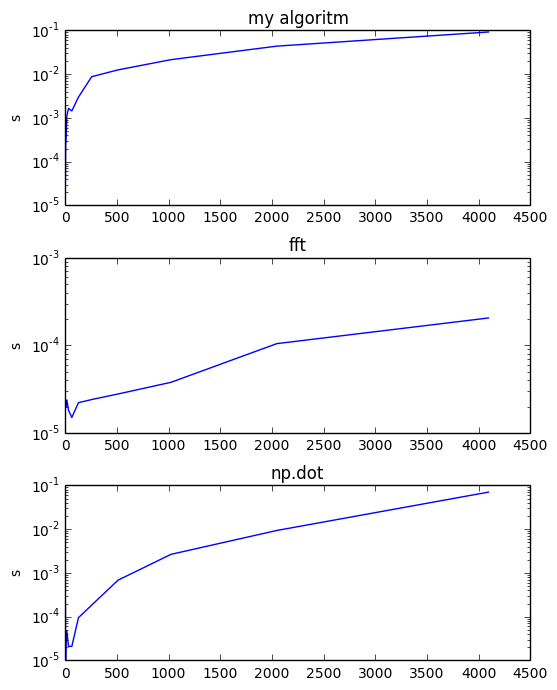

In [225]:
print(nn)
print(tm)
print(' ')
print(tf)
print(' ')
print(td)

plt.subplots_adjust(top=1.7,hspace=0.3)
plt.subplot(311)
plt.title('my algoritm')
plt.ylabel('s')
plt.semilogy(nn,tm)
plt.subplot(312)
plt.title('fft')
plt.ylabel('s')
plt.semilogy(nn,tf)
plt.subplot(313)
plt.title('np.dot')
plt.ylabel('s')
plt.semilogy(nn,td)